(15120, 3)
<class 'numpy.ndarray'>
(630, 630)
L


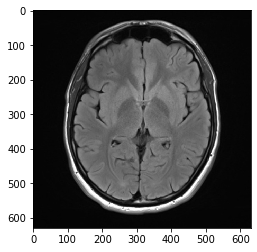

In [1]:
from PIL import Image
from numpy import asarray
#from pynufft import NUFFT_cpu
import numpy
import pynufft as pnft
import matplotlib.pyplot
NufftObj = pnft.NUFFT()
Nd=(630,630)
kd=(1260,1260)
Jd=(6,6)
om=numpy.random.randn(15120,3)
print(om.shape)
NufftObj.plan(om,Nd,kd,Jd)
image = Image.open('brain2.jpeg').convert('L')
data = asarray(image)
print(type(data))
print(data.shape)
print(image.mode)
matplotlib.pyplot.imshow(image, cmap=matplotlib.cm.gray)
matplotlib.pyplot.show()

y=NufftObj.forward(image)

In [11]:
image0 = NufftObj.solve(y, solver='cg',maxiter=50)
image3 = NufftObj.solve(y, solver='L1TVOLS',maxiter=40,rho=0.1)
#image4 = NufftObj.solve(y, solver='L1TVLAD',maxiter=50,rho=0.1)
image2 = NufftObj.adjoint(y ) # adjoint

Text(0.5, 1.0, 'Adjoint transform')

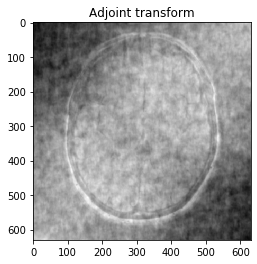

In [23]:
import matplotlib.pyplot
#matplotlib.pyplot.subplot(2,2,1)

#matplotlib.pyplot.imshow(image0.real, cmap=matplotlib.cm.gray, norm=matplotlib.colors.Normalize(vmin=0.0, vmax=70)


#matplotlib.pyplot.subplot(2,2,2)
matplotlib.pyplot.imshow(image2.real, cmap=matplotlib.cm.gray)
#matplotlib.pyplot.imshow(image2.real, cmap=matplotlib.cm.gray, norm=matplotlib.colors.Normalize(vmin=0.0, vmax=30))
matplotlib.pyplot.title('Adjoint transform')




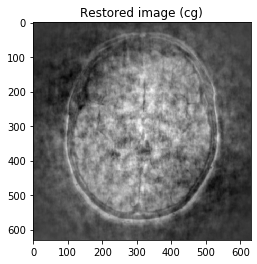

In [22]:
matplotlib.pyplot.title('Restored image (cg)')
matplotlib.pyplot.imshow(image0.real, cmap=matplotlib.cm.gray)
#matplotlib.pyplot.imshow(image0.real, cmap=matplotlib.cm.gray, norm=matplotlib.colors.Normalize(vmin=0.0, vmax=70))

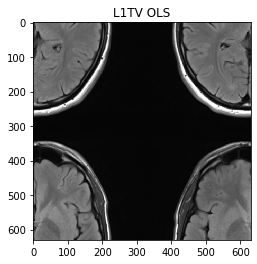

In [82]:
matplotlib.pyplot.title('L1TV OLS')
matplotlib.pyplot.imshow(numpy.abs(numpy.fft.fftshift(image)), cmap=matplotlib.cm.gray)


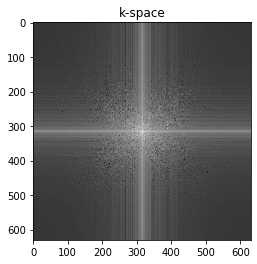

In [21]:
k= numpy.fft.fft2(image2.real)
k_space = 20*numpy.log(numpy.abs(numpy.fft.fftshift(k)))
matplotlib.pyplot.title('k-space')
matplotlib.pyplot.imshow(k_space.real,cmap=matplotlib.cm.gray)

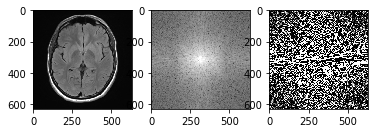

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('brain2.jpeg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
real = np.real(fshift)
magnitude = (np.abs(fshift))
phase = (np.angle(fshift))
photo = np.abs(np.multiply(magnitude, np.exp(1j * phase))) 

f = plt.figure()
f.add_subplot(1, 3, 1)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
f.add_subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap = 'gray', vmin = 0, vmax = 255)
f.add_subplot(1,3,3)
plt.imshow(real,cmap='gray',vmin=0,vmax=255)
plt.show(block = True)